In [444]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [445]:
dataset = pd.read_csv('/Users/haileybae/Downloads/MELBOURNE_housing_FULL.csv')

In [446]:
print (dataset.shape)

dataset.head()

""" Suburb: Suburb
Address: Address
Rooms: Number of rooms
Price: Price in Australian dollars
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
 SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; 
 SS - sold after auction price not disclosed. N/A - price or highest bid not available.
Type: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; 
    dev site - development site; o res - other residential.
SellerG: Real Estate Agent
Date: Date sold
Distance: Distance from CBD in Kilometres
Regionname: General Region (West, North West, North, North east ...etc)
Propertycount: Number of properties that exist in the suburb
Bedroom2 : Scraped # of Bedrooms (from different source)
Bathroom: Number of Bathrooms
Car: Number of carspots
Landsize: Land Size in Metres
BuildingArea: Building Size in Metres
YearBuilt: Year the house was built
CouncilArea: Governing council for the area
Lattitude: Self explanitory
Longtitude: Self explanitory """


(34857, 21)


' Suburb: Suburb\nAddress: Address\nRooms: Number of rooms\nPrice: Price in Australian dollars\nMethod: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;\n SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; \n SS - sold after auction price not disclosed. N/A - price or highest bid not available.\nType: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; \n    dev site - development site; o res - other residential.\nSellerG: Real Estate Agent\nDate: Date sold\nDistance: Distance from CBD in Kilometres\nRegionname: General Region (West, North West, North, North east ...etc)\nPropertycount: Number of properties that exist in the suburb\nBedroom2 : Scraped # of Bedrooms (from different source)\nBathroom: Number of Bathrooms\nCar: Number of carspots\nLandsize: Land Size in Metres\nBuildingArea: Building Size in Metres\nYearBuilt: Year the ho

In [447]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [448]:
# Find any duplicate rows 
dataset[dataset.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [449]:
# Remove duplicate rows
dataset.drop_duplicates(inplace=True)

In [450]:
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [451]:
dataset["Postcode"]

0        3067.0
1        3067.0
2        3067.0
3        3067.0
4        3067.0
          ...  
34852    3013.0
34853    3013.0
34854    3013.0
34855    3013.0
34856    3013.0
Name: Postcode, Length: 34856, dtype: float64

In [452]:
#Conver object columns into categorical/ date datatypes

obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']

for a in obj_cats: 
    dataset[a] = dataset[a].astype('category')

dataset.info()



<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       26630 non-null  float64 
 12  Car            26128 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  float

In [453]:
# Create an "Age" column to represent # years since the house was built

dataset["Age"] = 2024 - dataset["YearBuilt"]

In [454]:
#columns rooms and bedroom2 are the duplicates

dataset.drop("Bedroom2",axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bathroom       26630 non-null  float64 
 11  Car            26128 non-null  float64 
 12  Landsize       23046 non-null  float64 
 13  BuildingArea   13741 non-null  float64 
 14  YearBuilt      15550 non-null  float64 
 15  CouncilArea    34853 non-null  category
 16  Lattitude      26880 non-null  float64 
 17  Longtitude     26880 non-null  float

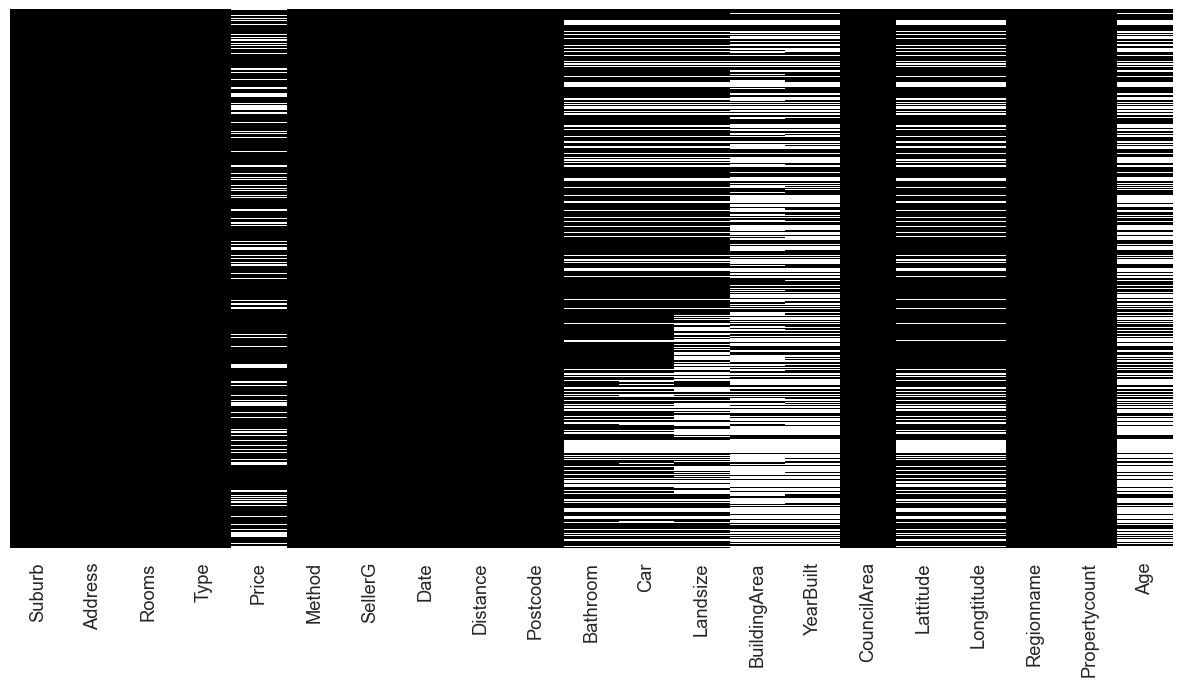

In [455]:
#Visualize missing values

plt.figure(figsize=(15, 7))
sns.set(font_scale=1.2)

# Generate the heatmap for missing values
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')

# Show the heatmap
plt.show()

In [456]:
# For each column, identify # of rows with missing values

dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
dtype: int64

In [457]:
#Percentage of missing values 

dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
Age              55.387882
dtype: float64

In [458]:
#Remove columns where >55% rows are missing values: BuildingArea, Year Built/ Age 

dataset.drop("BuildingArea",axis=1,inplace=True)
dataset.drop("YearBuilt",axis=1,inplace=True)
dataset.drop("Age",axis=1,inplace=True)

#Remove latitude and longitude given the location info is covered by Suburb, Regionname, and Distance
#dataset.drop("Lattitude",axis=1,inplace=True)
#dataset.drop("Longtitude",axis=1,inplace=True)

#Remove rows where price is missing values

dataset.dropna(axis=0, subset="Price", inplace=True)

dataset.info()
dataset.isnull().sum()/len(dataset)*100


<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  CouncilArea    27244 non-null  category
 14  Lattitude      20993 non-null  float64 
 15  Longtitude     20993 non-null  float64 
 16  Regionname     27244 non-null  category
 17  Propertycount  27244 non-null  float

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

In [459]:
dataset = dataset.dropna(subset=['Postcode'])
dataset['Postcode'] = dataset['Postcode'].astype(int).astype(str).str.zfill(5)

dataset["Postcode"]

1        03067
2        03067
4        03067
5        03067
6        03067
         ...  
34852    03013
34853    03013
34854    03013
34855    03013
34856    03013
Name: Postcode, Length: 27246, dtype: object

In [460]:
#pip install geopy

33259.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [461]:
""" #Lat & Long: Replace based on house addresses using Google's API
from geopy.geocoders import GoogleV3

# Replace 'your_api_key' with your actual Google API key
geolocator = GoogleV3(api_key='your_api_key')
for index, row in dataset.iterrows():
    if  (pd.isnull(row['Lattitude'])) or (pd.isnull(row['Longtitude'])):
        address = f"{row['Address']}, {row['Postcode']}"
        try:
            location = geolocator.geocode(address)
            if location:
                dataset.at[index, 'Lattitude'] = location.latitude
                dataset.at[index, 'Longtitude'] = location.longitude
        except GeocoderTimedOut:
            continue """

' #Lat & Long: Replace based on house addresses using Google\'s API\nfrom geopy.geocoders import GoogleV3\n\n# Replace \'your_api_key\' with your actual Google API key\ngeolocator = GoogleV3(api_key=\'your_api_key\')\nfor index, row in dataset.iterrows():\n    if  (pd.isnull(row[\'Lattitude\'])) or (pd.isnull(row[\'Longtitude\'])):\n        address = f"{row[\'Address\']}, {row[\'Postcode\']}"\n        try:\n            location = geolocator.geocode(address)\n            if location:\n                dataset.at[index, \'Lattitude\'] = location.latitude\n                dataset.at[index, \'Longtitude\'] = location.longitude\n        except GeocoderTimedOut:\n            continue '

In [462]:
# Remove Suburb, Address, CouncilArea, Regionname, Method, SellerG
dataset.drop("Address",axis=1,inplace=True)
dataset.drop("Suburb",axis=1,inplace=True)
dataset.drop("CouncilArea",axis=1,inplace=True)
dataset.drop("Regionname",axis=1,inplace=True)
dataset.drop("Method",axis=1,inplace=True)
dataset.drop("SellerG",axis=1,inplace=True)

In [463]:
# Identifying Outliers usign Z-score Method


numeric_columns = dataset.select_dtypes(['float64','int64'])
z_score_threshold = 3
mask = pd.Series(True, index=dataset.index)


for col in numeric_columns:
    z_scores = (dataset[col] - dataset[col].mean())/dataset[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, dataset[col][outliers].count())
    mask &= ~outliers
dataset = dataset[mask]
dataset.describe().transpose()


Outlier counts of column: Rooms 180
Outlier counts of column: Price 474
Outlier counts of column: Distance 628
Outlier counts of column: Bathroom 238
Outlier counts of column: Car 264
Outlier counts of column: Landsize 33
Outlier counts of column: Lattitude 251
Outlier counts of column: Longtitude 235
Outlier counts of column: Propertycount 727


,count,mean,std,min,25%,50%,75%,max
Rooms,24813.0,2.928989e+00,0.897200,1.0000,2.00000,3.00000,3.000000e+00,5.000000e+00
Price,24813.0,1.011489e+06,506083.350295,85000.0000,642000.00000,880000.00000,1.280000e+06,2.960000e+06
Distance,24813.0,1.063012e+01,5.652008,0.0000,6.30000,10.10000,1.390000e+01,3.120000e+01
Bathroom,18803.0,1.539435e+00,0.619486,0.0000,1.00000,1.00000,2.000000e+00,3.000000e+00
Car,18446.0,1.624851e+00,0.847683,0.0000,1.00000,2.00000,2.000000e+00,4.000000e+00
Landsize,16309.0,4.878669e+02,540.537960,0.0000,205.00000,470.00000,6.500000e+02,1.010000e+04
Lattitude,18973.0,-3.780695e+01,0.081600,-38.0796,-37.86003,-37.80134,-3.775412e+01,-3.753622e+01
Longtitude,18973.0,1.449977e+02,0.110815,144.6358,144.92493,145.00130,1.450679e+02,1.453540e+02
Propertycount,24811.0,7.112242e+03,3832.271878,389.0000,4217.00000,6482.00000,9.704000e+03,1.749600e+04


In [464]:
# Impute Landsize (medians grouped by Rooms and Type)
median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()
median_landsize.columns = ['Rooms', 'Type', 'median_landsize']

dataset = dataset.merge(median_landsize, on=['Rooms', 'Type'], how='left')
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['median_landsize'])
dataset.drop(columns=['median_landsize'], inplace=True)



# Impute bathroom (medians grouped by Rooms)
median_bathroom = dataset.groupby(['Rooms'])['Bathroom'].median().reset_index()
median_bathroom.columns = ['Rooms', 'median_bathroom']

dataset = dataset.merge(median_bathroom, on=['Rooms'], how='left')
dataset['Bathroom'] = dataset['Bathroom'].fillna(dataset['median_bathroom'])
dataset.drop(columns=['median_bathroom'], inplace=True)

# Impute Car
dataset['Car'].fillna(dataset['Car'].median(),inplace=True)

# Impute Propertycount
dataset['Propertycount'].fillna(dataset['Propertycount'].median(),inplace=True)

dataset.isnull().sum()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Rooms          24813 non-null  int64   
 1   Type           24813 non-null  category
 2   Price          24813 non-null  float64 
 3   Date           24813 non-null  category
 4   Distance       24813 non-null  float64 
 5   Postcode       24813 non-null  object  
 6   Bathroom       24813 non-null  float64 
 7   Car            24813 non-null  float64 
 8   Landsize       24813 non-null  float64 
 9   Lattitude      18973 non-null  float64 
 10  Longtitude     18973 non-null  float64 
 11  Propertycount  24813 non-null  float64 
dtypes: category(2), float64(8), int64(1), object(1)
memory usage: 1.9+ MB


/var/folders/vc/sdp2qmwd0mxdyydhn34f9mzc0000gn/T/ipykernel_76870/2253609902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()
/var/folders/vc/sdp2qmwd0mxdyydhn34f9mzc0000gn/T/ipykernel_76870/2253609902.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.

In [465]:
# Save the new df to a csv file 
#dataset.to_csv('cleaned_melbourne_housing.csv', index=False)


<Figure size 1600x700 with 0 Axes>

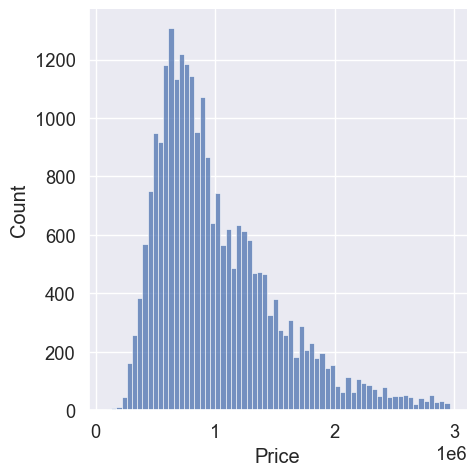

In [466]:
plt.figure(figsize=(16,7))
sns.displot(dataset['Price'],kde = False)

<Figure size 1600x700 with 0 Axes>

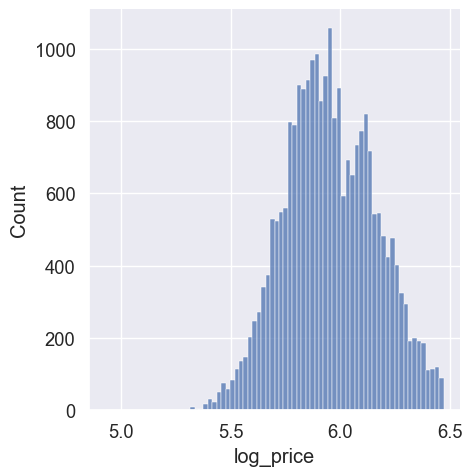

In [467]:
# Log transform the price variable to achieve a normal distribution 
#x = np.log10(dataset["Price"])
dataset["log_price"] = np.log10(dataset["Price"])
plt.figure(figsize=(16,7))
sns.displot(dataset["log_price"],kde = False)


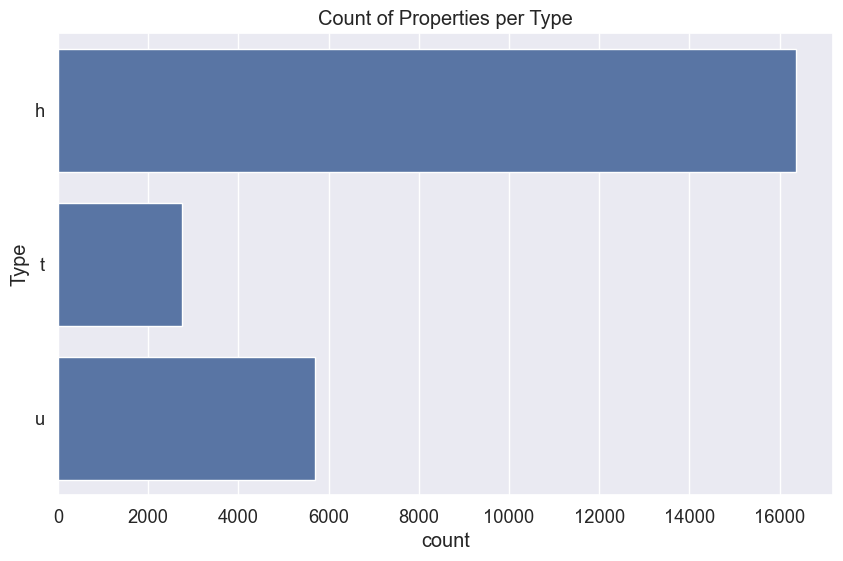

In [468]:
title = 'Count of properties per Type'
#Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; 
plt.figure(figsize=(10, 6))
title = 'Count of Properties per Type'

sns.countplot(y=dataset['Type'])
plt.title(title)

plt.show()

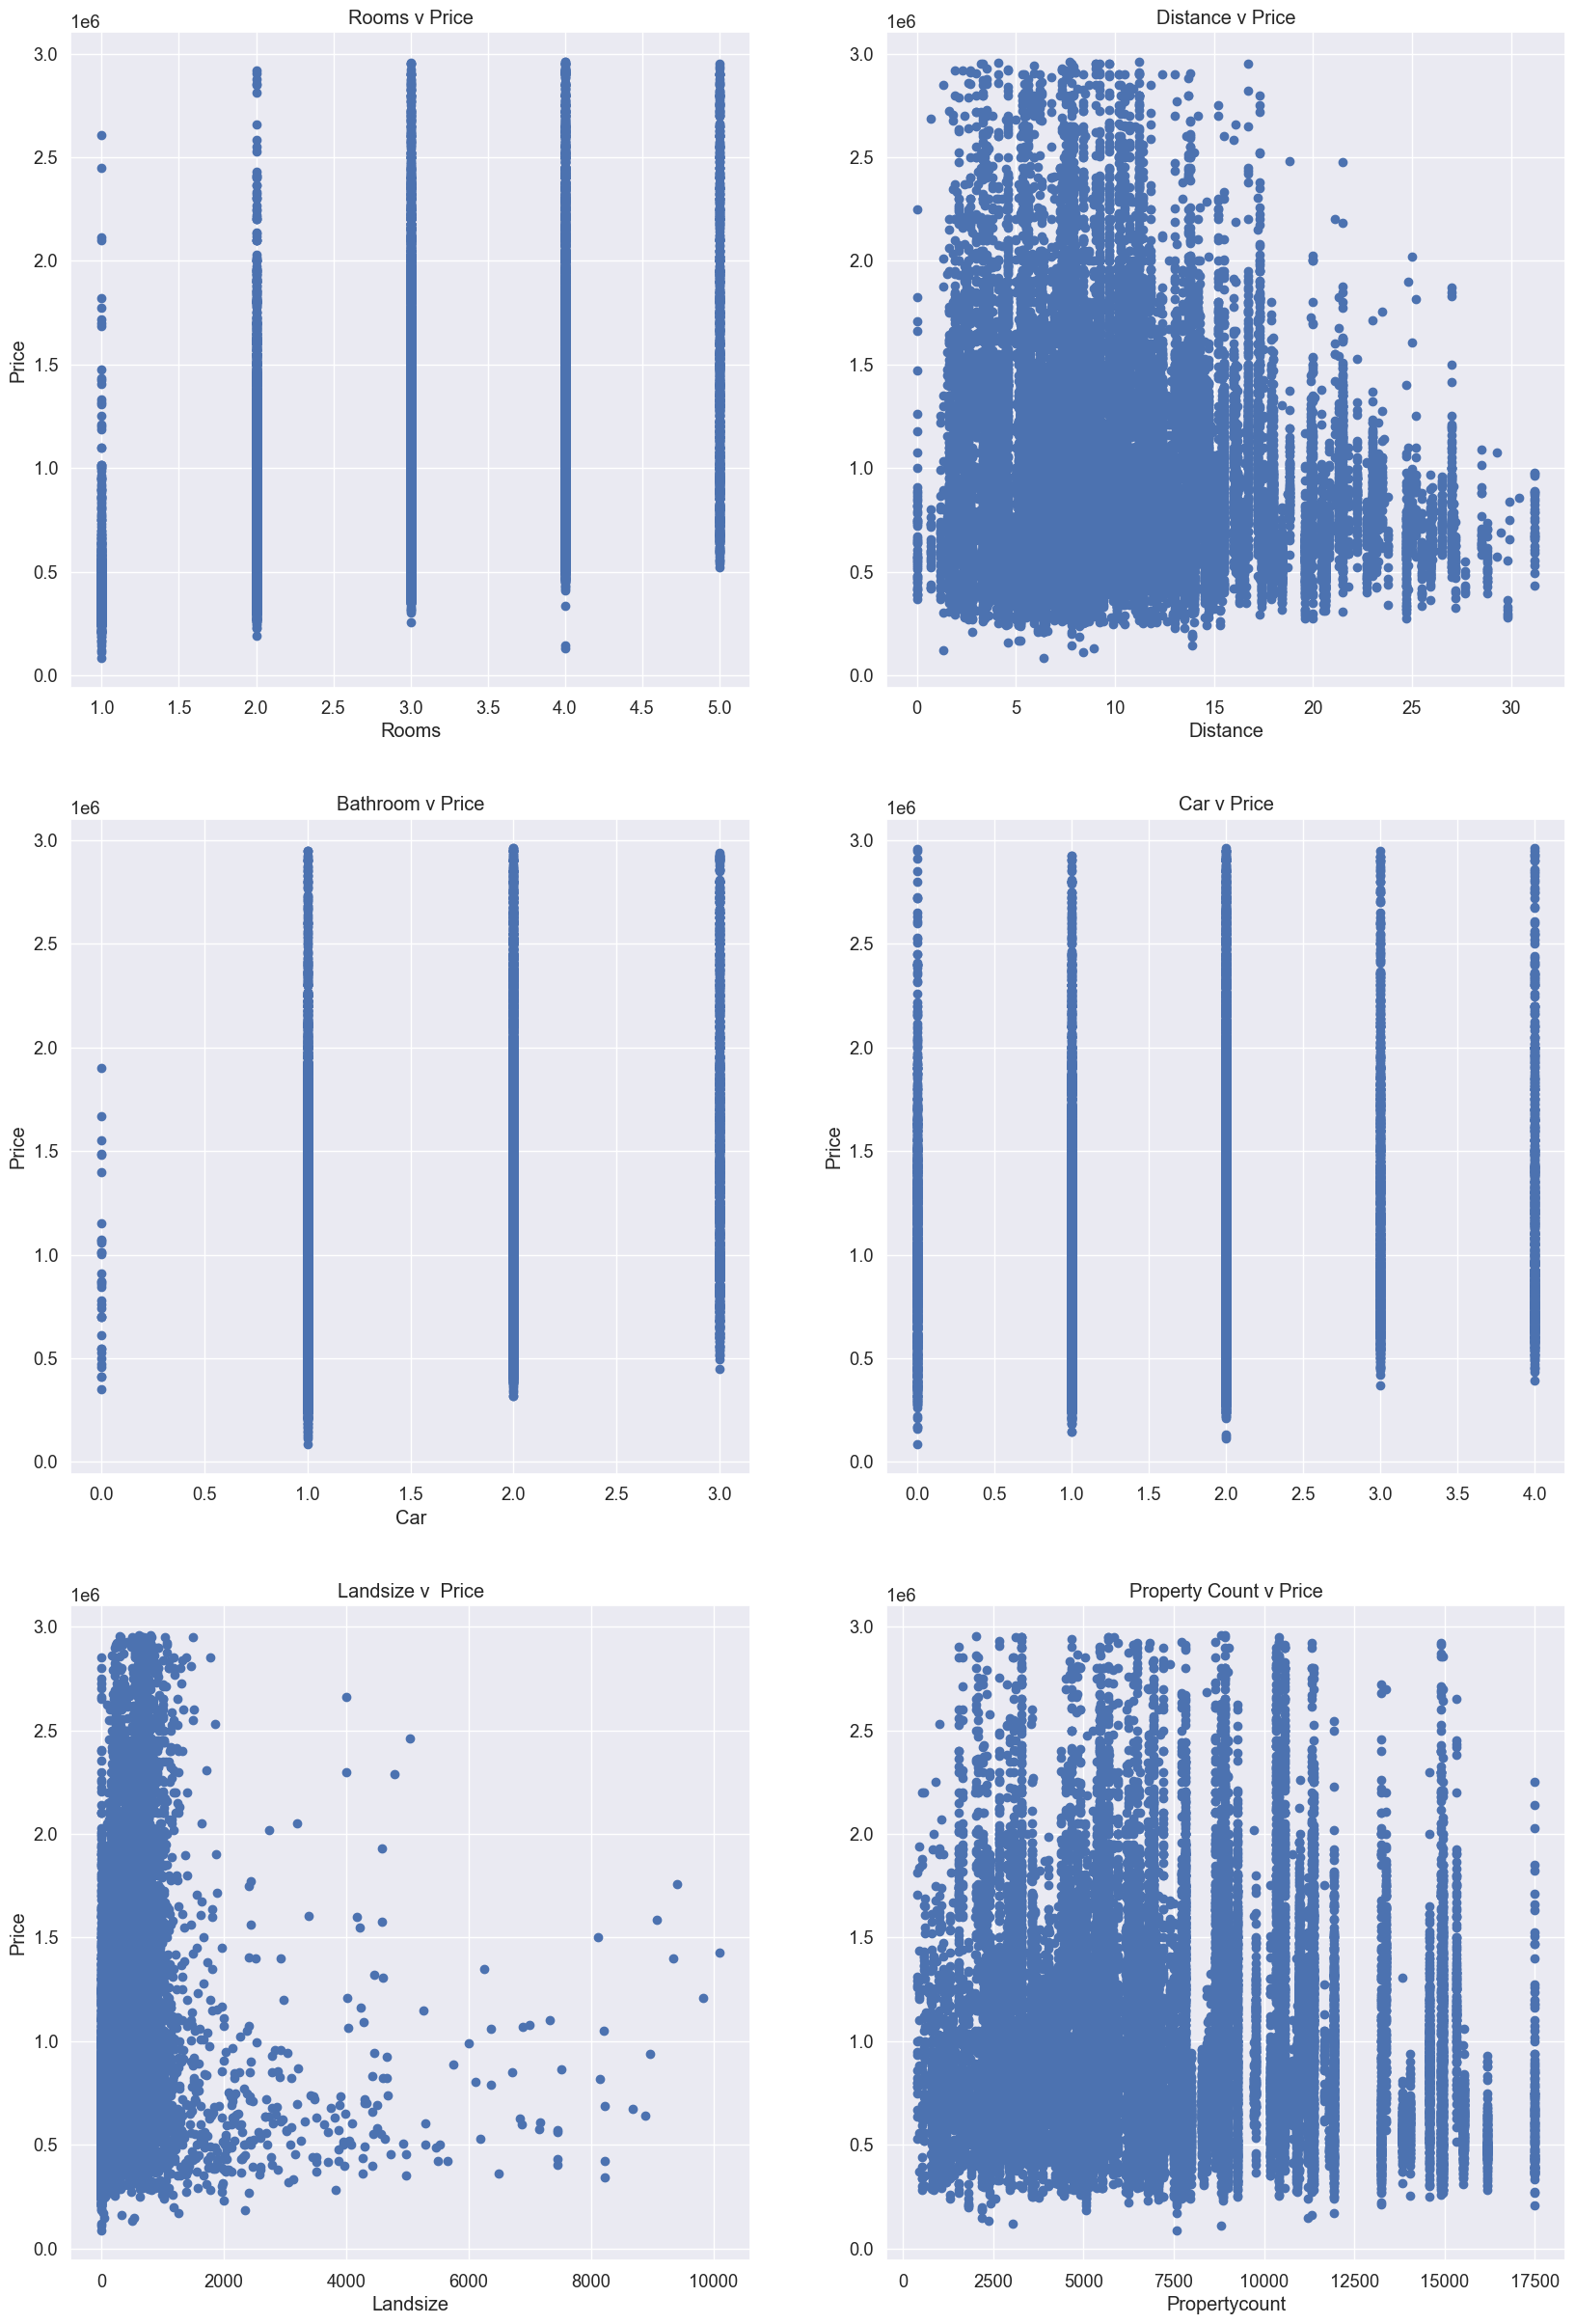

In [469]:

f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [3,1]
axes[2,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[2,1].set_title('Property Count v Price')

plt.show()

In [470]:
numeric_columns = dataset.select_dtypes(['float64','int64'])

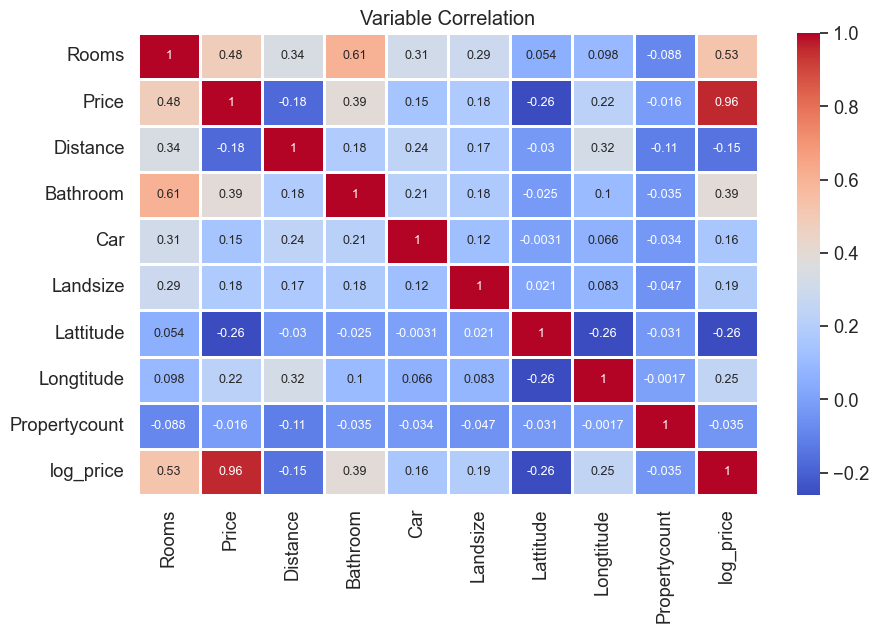

In [471]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()